1/1 [==============================] - 0s 141ms/step
Prediction: two


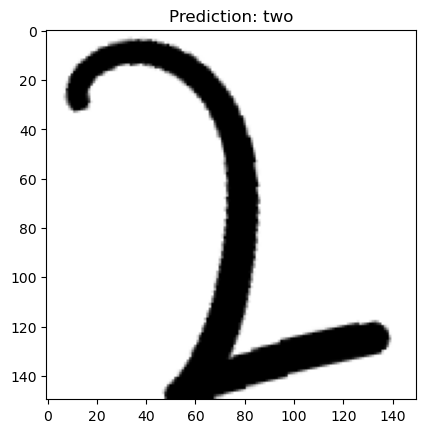

In [18]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
import random
import matplotlib.pyplot as plt

# Define a function to load and preprocess images using OpenCV
def load_image(filepath):
    # Load image and convert to RGB
    img = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if img is None:
        raise ValueError(f"Failed to load image: {filepath}")
    if img.size == 0:
        raise ValueError(f"Image has zero size: {filepath}")

    # Resize image to (150, 150)
    img = cv2.resize(img, (150, 150))

    # Preprocess the image using the VGG16 preprocessing function
    img = preprocess_input(img)

    return img

# Load the saved VGG16 model
model_path = "C:/Users/Jang Dong Min/Desktop/h5/model_final.h5"
model = load_model(model_path)

# Define the path to the test directory
test_dir = "C:/Users/Jang Dong Min/Desktop/dataset/test"

# Get a list of all image files in the test directory
image_files = [os.path.join(dirpath, f) for dirpath, dirnames, files in os.walk(test_dir) for f in files if f.endswith(".png")]

# Select a random test image file
img_path = random.choice(image_files)

# Load and preprocess the test image
img = load_image(img_path)

# Make a prediction
prediction = model.predict(np.array([img]))

# Interpret the prediction
class_id = np.argmax(prediction)
class_names = ['add', 'divide', 'eight', 'five', 'four', 'multiply', 'nine', 'one', 'seven', 'six', 'subtract', 'three', 'two', 'zero']
class_name = class_names[class_id]
print("Prediction: {}".format(class_name))

# Display the test image using Matplotlib
plt.imshow(cv2.imread(img_path))
plt.title(f"Prediction: {class_name}")
plt.show()

In [20]:
import cv2
import pytesseract
import numpy as np
from keras.models import load_model

# pytesseract에서 Tesseract OCR 경로 설정
pytesseract.pytesseract.tesseract_cmd = "C:/Program Files/Tesseract-OCR/tesseract.exe"

# 모델 로드
model_path = "C:/Users/Jang Dong Min/Desktop/h5/model_final.h5"
model = load_model(model_path)

# 숫자와 연산자에 대한 라벨
labels = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
          10: '+', 11: '-', 12: 'x', 13: '÷'}

def load_and_process_image(image_file):
    # 이미지 로드 및 전처리
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    image = cv2.resize(image, (150, 150))
    image = np.array(image, dtype=np.float32)
    image = (image - 127.5) / 127.5
    image = np.expand_dims(image, axis=0)

    return image

def predict_expression(image_file):
    # 이미지 전처리
    image = load_and_process_image(image_file)

    # 모델 예측
    pred = model.predict(image)
    pred_idx = np.argmax(pred, axis=1)[0]
    pred_label = labels[pred_idx]

    return pred_label

image_file = "C:/Users/Jang Dong Min/Desktop/1+3.png"

# 이미지에서 숫자와 연산자를 추출해서 리스트로 저장
expression_list = []
text = pytesseract.image_to_string(image_file, lang='eng', config='--psm 6')
for char in text:
    if char.isdigit() or char in ['+', '-', 'x', '÷']:
        expression_list.append(char)

# 추출한 문자열 리스트를 결합해서 수식 문자열 생성
expression_str = ''.join(expression_list)

# 수식 문자열에서 숫자와 연산자를 인식해서 계산 결과 도출
result = eval(expression_str)

# 결과 출력
print(f'{expression_str} = {result}')

4+3 = 7
